In [1]:
import os
import sys

home=os.path.expanduser("~")
os.environ["SPARK_HOME"]=os.path.join(home, 'spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [2]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).getOrCreate()

# 로지스틱 회귀분석
* logit(p) = log(p/1−p)
* Odds는 p/1−p

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


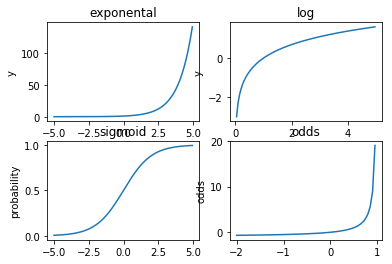

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(-5,5,0.05)
fig=plt.figure()

ax221=fig.add_subplot(221)
ax221.set_title('exponental')
exp=np.exp(x)
ax221.plot(x,exp,'-')
ax221.set_ylabel('y')

ax222=fig.add_subplot(222)
ax222.set_title('log')
log=np.log(x)
ax222.plot(x,log,'-')
ax222.set_ylabel('y')

ax223=fig.add_subplot(223)
ax223.set_title('sigmoid')
sigmoid=lambda(x):1.0/(1+np.exp(-x))
sig=sigmoid(x)
ax223.plot(x,sig,'-')
ax223.set_ylabel('probability')


ax224=fig.add_subplot(224)
ax224.set_title('odds')
x=np.arange(-2,1,0.05)  # when x=1, division by zero
odds=lambda(x):x/(1-x)
odd=odds(x)
ax224.plot(x,odd,'-')
ax224.set_ylabel('odds')

plt.show()

# ln(p/1−p)=w0+w1x 풀기
* p=1/1+e^−(w0+w1x)

* 확률 p≥0.5 -> Y=1
* 확률 p<0.5 -> Y=0

In [11]:
import numpy as np
x=np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
y=np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])
print x

[0.5  0.75 1.   1.25 1.5  1.75 1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 4.   4.25 4.5  4.75 5.   5.5 ]


In [12]:
x=np.array([x,np.ones(x.shape[0])])
x=x.T
print x

[[0.5  1.  ]
 [0.75 1.  ]
 [1.   1.  ]
 [1.25 1.  ]
 [1.5  1.  ]
 [1.75 1.  ]
 [1.75 1.  ]
 [2.   1.  ]
 [2.25 1.  ]
 [2.5  1.  ]
 [2.75 1.  ]
 [3.   1.  ]
 [3.25 1.  ]
 [3.5  1.  ]
 [4.   1.  ]
 [4.25 1.  ]
 [4.5  1.  ]
 [4.75 1.  ]
 [5.   1.  ]
 [5.5  1.  ]]


In [16]:
import statsmodels.api as sm
logit = sm.Logit(y,x)
result = logit.fit()
w1,w0=result.params
print w1,w0

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
1.504645428373334 -4.077713431087632


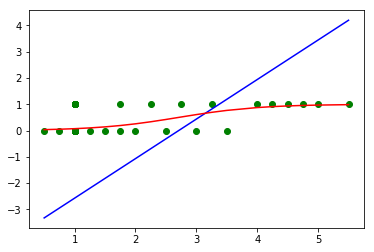

In [17]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'go')
plt.plot(x,w0+w1*x,'b-')
plt.plot(x,1/(1+np.exp(-(w0+w1*x))),'r-')
plt.show()

# Gradient
* cost=
* −log(h(x)) if y=1
* −log(1−h(x)) if y=0

In [33]:
x1=x
y1=y
print x1[:5]
print y1[:5]

[[0.5  1.  ]
 [0.75 1.  ]
 [1.   1.  ]
 [1.25 1.  ]
 [1.5  1.  ]]
[0 0 0 0 0]


In [34]:
def h(x,theta):
    z=np.dot(x,theta)
    return sigmoid(z)

In [35]:
print x1.shape
weights=np.ones([x1.shape[1],1])
print weights,weights.shape

(20, 2)
[[1.]
 [1.]] (2, 1)


In [36]:
h(x1[:5],weights)

array([[0.81757448],
       [0.8519528 ],
       [0.88079708],
       [0.90465054],
       [0.92414182]])

In [37]:
y1=y1[:,np.newaxis]
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
print loss(h(x1,weights),y1)
error=h(x1,weights)-y1
np.dot(x1.T,error)

1.4373882978982158


array([[16.42888382],
       [ 9.05573467]])

In [38]:
def gradientDescent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]
gradientDescent(x1,h(x1,weights),y1)

array([[0.82144419],
       [0.45278673]])

In [39]:
iter=10000
alpha=0.01

weights=np.ones([x1.shape[1],1])

for i in range(iter):
    _h=h(x1,weights)
    error=_h-y1
    gradient=np.dot(x1.T, error)
    weights-=alpha*gradient
    if i%1000==0:
        print "{0} theta:{1}".format(i,weights)
print weights

0 theta:[[0.83571116]
 [0.90944265]]
1000 theta:[[ 1.46445514]
 [-3.95885309]]
2000 theta:[[ 1.50248787]
 [-4.07133946]]
3000 theta:[[ 1.50452706]
 [-4.07736375]]
4000 theta:[[ 1.50463893]
 [-4.07769422]]
5000 theta:[[ 1.50464507]
 [-4.07771238]]
6000 theta:[[ 1.50464541]
 [-4.07771337]]
7000 theta:[[ 1.50464543]
 [-4.07771343]]
8000 theta:[[ 1.50464543]
 [-4.07771343]]
9000 theta:[[ 1.50464543]
 [-4.07771343]]
[[ 1.50464543]
 [-4.07771343]]


# 입학

In [43]:
import pandas as pd
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df.head()
df.columns = ["admit", "gre", "gpa", "prestige"]

In [44]:
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


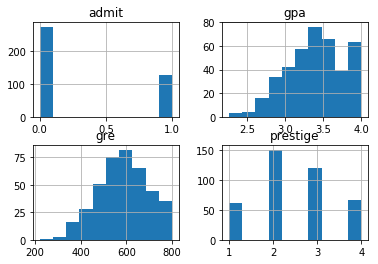

In [45]:
%matplotlib inline
import pylab as pl
df.hist()
pl.show()

## 모델링

In [46]:
from patsy import dmatrices
y, X = dmatrices('admit ~ gre + gpa + C(prestige)', df, return_type = 'dataframe')

In [47]:
X.head()

,Intercept,C(prestige)[T.2],C(prestige)[T.3],C(prestige)[T.4],gre,gpa
0,1.0,0.0,1.0,0.0,380.0,3.61
1,1.0,0.0,1.0,0.0,660.0,3.67
2,1.0,0.0,0.0,0.0,800.0,4.00
3,1.0,0.0,0.0,1.0,640.0,3.19
4,1.0,0.0,0.0,1.0,520.0,2.93


In [48]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y,X)
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Dec 2019   Pseudo R-squ.:                 0.08292
Time:                        16:32:37   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(prestige)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(X, y)
model.coef_

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-3.97765654e+00, -6.74567838e-01, -1.33708167e+00,
        -1.55029740e+00,  2.25513643e-03,  8.01765501e-01]])

# 성별

In [53]:
import statsmodels.api as sm
mass=sm.datasets.get_rdataset("survey","MASS")

In [54]:
mass.data.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [55]:
mass.data.columns=['sex','wr','nw','w','fold','pulse','clap','exer','smoke','height','mi','age']

# 로지스틱

In [59]:
formula='sex ~ wr+nw+w+pulse+height+age'
import statsmodels.formula.api as smf
model=smf.glm(formula,data=mass.data,family=sm.families.Binomial()).fit()
print (model.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['sex[Female]', 'sex[Male]']   No. Observations:                  168
Model:                                      GLM   Df Residuals:                      161
Model Family:                          Binomial   Df Model:                            6
Link Function:                            logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -52.236
Date:                          Wed, 04 Dec 2019   Deviance:                       104.47
Time:                                  16:45:53   Pearson chi2:                     646.
No. Iterations:                               6                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [60]:
formula2='sex ~ nw+height'
model2=smf.glm(formula2,data=mass.data,family=sm.families.Binomial()).fit()
print (model2.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['sex[Female]', 'sex[Male]']   No. Observations:                  207
Model:                                      GLM   Df Residuals:                      204
Model Family:                          Binomial   Df Model:                            2
Link Function:                            logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -67.329
Date:                          Wed, 04 Dec 2019   Deviance:                       134.66
Time:                                  16:46:06   Pearson chi2:                     468.
No. Iterations:                               6                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [61]:
formula3='height ~ 1+sex'
model3=smf.ols(formula3,data=mass.data).fit()
print model3.summary()

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           3.86e-28
Time:                        16:46:24   Log-Likelihood:                -709.66
No. Observations:                 208   AIC:                             1423.
Df Residuals:                     206   BIC:                             1430.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     165.6867      0.730    226.978      

# Titanic

In [62]:
import os
_trainDf = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true')\
    .load(os.path.join("data","kaggle","titanic","train.csv"))

In [63]:
_trainDf.show(3, truncate=True)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|     |       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|     |       S|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
only showing top 3 rows



In [64]:
_testDf = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true')\
    .load(os.path.join("data","kaggle","titanic","test.csv"))

In [65]:
_testDf.show(3, truncate=True)

+-----------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|  Fare|Cabin|Embarked|
+-----------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
|        892|     3|    Kelly, Mr. James|  male|34.5|    0|    0|330911|7.8292|     |       Q|
|        893|     3|Wilkes, Mrs. Jame...|female|47.0|    1|    0|363272|   7.0|     |       S|
|        894|     2|Myles, Mr. Thomas...|  male|62.0|    0|    0|240276|9.6875|     |       Q|
+-----------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
only showing top 3 rows



In [66]:
from pyspark.sql.functions import lit, col
_trainDf = _trainDf.withColumn('testOrtrain',lit('train'))
_testDf = _testDf.withColumn('testOrtrain',lit('test'))

In [67]:
_testDf = _testDf.withColumn('Survived',lit(99))

In [68]:
_trainDf.printSchema()
_testDf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- testOrtrain: string (nullable = false)

root
 |-- PassengerId: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- testOrtrain: string (nullable = false)
 |-- Survived: integer (null

In [69]:
df=_trainDf.select('PassengerId','Survived','Pclass','Name','Sex','Age',\
                   'SibSp','Parch','Ticket','Fare','Cabin','Embarked','testOrtrain')\
            .union(_testDf.select('PassengerId','Survived','Pclass','Name','Sex','Age',\
                   'SibSp','Parch','Ticket','Fare','Cabin','Embarked','testOrtrain'))

In [70]:
df.select('testOrtrain','Survived','Name')\
    .filter(df['testOrtrain']=='test').show(10)

+-----------+--------+--------------------+
|testOrtrain|Survived|                Name|
+-----------+--------+--------------------+
|       test|      99|    Kelly, Mr. James|
|       test|      99|Wilkes, Mrs. Jame...|
|       test|      99|Myles, Mr. Thomas...|
|       test|      99|    Wirz, Mr. Albert|
|       test|      99|Hirvonen, Mrs. Al...|
|       test|      99|Svensson, Mr. Joh...|
|       test|      99|Connolly, Miss. Kate|
|       test|      99|Caldwell, Mr. Alb...|
|       test|      99|Abrahim, Mrs. Jos...|
|       test|      99|Davies, Mr. John ...|
+-----------+--------+--------------------+
only showing top 10 rows



In [71]:
from pyspark.sql.functions import count
df.agg(*[count(c).alias(c) for c in df.columns]).show()

+-----------+--------+------+----+----+----+-----+-----+------+----+-----+--------+-----------+
|PassengerId|Survived|Pclass|Name| Sex| Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|testOrtrain|
+-----------+--------+------+----+----+----+-----+-----+------+----+-----+--------+-----------+
|       1309|    1309|  1309|1309|1309|1046| 1309| 1309|  1309|1308| 1309|    1309|       1309|
+-----------+--------+------+----+----+----+-----+-----+------+----+-----+--------+-----------+



In [72]:
def countNull(df,var):
    return df.where(df[var].isNull()).count()

missing = {c: countNull(df,c) for c in ['Survived','Age','SibSp','Parch','Fare']}

print missing

{'Fare': 1, 'Age': 263, 'SibSp': 0, 'Survived': 0, 'Parch': 0}


In [73]:
print df.filter("Age is NULL").show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+-----------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|  Fare|Cabin|Embarked|testOrtrain|
+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+-----------+
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|330877|8.4583|     |       Q|      train|
|         18|       1|     2|Williams, Mr. Cha...|  male|null|    0|    0|244373|  13.0|     |       S|      train|
|         20|       1|     3|Masselmani, Mrs. ...|female|null|    0|    0|  2649| 7.225|     |       C|      train|
|         27|       0|     3|Emir, Mr. Farred ...|  male|null|    0|    0|  2631| 7.225|     |       C|      train|
|         29|       1|     3|"O'Dwyer, Miss. E...|female|null|    0|    0|330959|7.8792|     |       Q|      train|
+-----------+--------+------+--------------------+------+----+-----+----

In [74]:
from pyspark.sql import functions as F

avgAge=df.agg(F.avg(df['Age']).alias('meanAge')).collect()
avgFare=df.agg(F.avg(df['Fare']).alias('meanFare')).collect()

In [75]:
print avgAge[0]['meanAge']
print avgFare[0]['meanFare']

29.8811376673
33.2954792813


In [76]:
print df.groupBy().mean('Age').first()
print df.groupBy().mean('Fare').first()

Row(avg(Age)=29.881137667304014)
Row(avg(Fare)=33.29547928134553)


In [77]:
df.describe(['Age']).show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|              1046|
|   mean|29.881137667304014|
| stddev| 14.41349321127132|
|    min|              0.17|
|    max|              80.0|
+-------+------------------+



### 결측값 대치하기

In [78]:
from pyspark.sql.functions import when,isnull
df=df.withColumn("Age", when(isnull(df['Age']), avgAge[0]['meanAge']).otherwise(df.Age))
df=df.withColumn("Fare", when(isnull(df['Fare']), avgFare[0]['meanFare']).otherwise(df.Fare))

### outlier

In [79]:
quantiles=df.stat.approxQuantile('Age', [0.25,0.75], 0.0 )
print quantiles

[22.0, 35.0]


In [80]:
mid50 = quantiles[1]-quantiles[0]
lower = quantiles[0] - 1.15*mid50
upper = quantiles[1] + 2.0*mid50
print lower, upper

7.05 61.0


In [81]:
df.filter((df.Age<lower) | (df.Age>upper)).show(3,truncate=True)

+-----------+--------+------+--------------------+------+---+-----+-----+-------+------+-----+--------+-----------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch| Ticket|  Fare|Cabin|Embarked|testOrtrain|
+-----------+--------+------+--------------------+------+---+-----+-----+-------+------+-----+--------+-----------+
|          8|       0|     3|Palsson, Master. ...|  male|2.0|    3|    1| 349909|21.075|     |       S|      train|
|         11|       1|     3|Sandstrom, Miss. ...|female|4.0|    1|    1|PP 9549|  16.7|   G6|       S|      train|
|         17|       0|     3|Rice, Master. Eugene|  male|2.0|    4|    1| 382652|29.125|     |       Q|      train|
+-----------+--------+------+--------------------+------+---+-----+-----+-------+------+-----+--------+-----------+
only showing top 3 rows



## 정규식

In [82]:
import re
def getTitle(name):
    title=None
    if re.search(".*Mr\..*", name):
        title="male"
    elif re.search(".*[Miss|Mrs|Ms]\..*", name):
        title="female"
    return title

In [83]:
names=["Braund, Mr. Owen Harris",
       "Cumings, Mrs. John Bradley (Florence Briggs Thayer)",
       "Heikkinen, Miss. Laina",
       "Ms.hello",
       "No title"]
for n in names:
    print getTitle(n)

male
female
female
female
None


In [84]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

getTitleUdf = udf(getTitle, StringType())
df = df.withColumn('Title', getTitleUdf(df['Name']))

In [85]:
 df.select('testOrtrain','Name','Title','Sex')\
    .filter(df['testOrtrain']=='test')\
    .show(10,truncate=False)

+-----------+--------------------------------------------+------+------+
|testOrtrain|Name                                        |Title |Sex   |
+-----------+--------------------------------------------+------+------+
|test       |Kelly, Mr. James                            |male  |male  |
|test       |Wilkes, Mrs. James (Ellen Needs)            |female|female|
|test       |Myles, Mr. Thomas Francis                   |male  |male  |
|test       |Wirz, Mr. Albert                            |male  |male  |
|test       |Hirvonen, Mrs. Alexander (Helga E Lindqvist)|female|female|
|test       |Svensson, Mr. Johan Cervin                  |male  |male  |
|test       |Connolly, Miss. Kate                        |female|female|
|test       |Caldwell, Mr. Albert Francis                |male  |male  |
|test       |Abrahim, Mrs. Joseph (Sophie Halaut Easu)   |female|female|
|test       |Davies, Mr. John Samuel                     |male  |male  |
+-----------+--------------------------------------

In [86]:
df=df.withColumn("SurvivedD",_trainDf['Survived']\
    .cast("double"))\
    .drop('Survived')

In [87]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
#from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

SexIndexer = StringIndexer(inputCol="Sex", outputCol="SexI")
EmbarkedIndexer = StringIndexer(inputCol="Embarked", outputCol="EmbarkedI")

In [88]:
va = VectorAssembler(inputCols=["Pclass","SexI","Age","SibSp","Parch",\
                                "Fare","EmbarkedI"],\
                     outputCol="features")

In [89]:
pipeline = Pipeline(stages=[SexIndexer,EmbarkedIndexer,va])
model = pipeline.fit(df)

In [90]:
myDf = model.transform(df)
myDf.select('SurvivedD','features').show(10)

+---------+--------------------+
|SurvivedD|            features|
+---------+--------------------+
|      0.0|[3.0,0.0,22.0,1.0...|
|      1.0|[1.0,1.0,38.0,1.0...|
|      1.0|[3.0,1.0,26.0,0.0...|
|      1.0|[1.0,1.0,35.0,1.0...|
|      0.0|(7,[0,2,5],[3.0,3...|
|      0.0|[3.0,0.0,29.88113...|
|      0.0|(7,[0,2,5],[1.0,5...|
|      0.0|[3.0,0.0,2.0,3.0,...|
|      1.0|[3.0,1.0,27.0,0.0...|
|      1.0|[2.0,1.0,14.0,1.0...|
+---------+--------------------+
only showing top 10 rows



In [91]:
train=myDf.filter(myDf['testOrtrain']=='train')
testDf=myDf.filter(myDf['testOrtrain']=='test')

In [92]:
trainDf,validateDf = train.randomSplit([0.7,0.3],seed=11)

In [93]:
from pyspark.ml.classification import LogisticRegression
 
# regPara: lasso regularisation parameter (L1)
lr = LogisticRegression().\
    setLabelCol('SurvivedD').\
    setFeaturesCol('features').\
    setRegParam(0.0).\
    setMaxIter(100).\
    setElasticNetParam(0.)

In [94]:
lrModel=lr.fit(trainDf)

In [96]:
lrDf = lrModel.transform(validateDf)

In [97]:
lrDf.select('SurvivedD','rawPrediction','probability','prediction').show()

+---------+--------------------+--------------------+----------+
|SurvivedD|       rawPrediction|         probability|prediction|
+---------+--------------------+--------------------+----------+
|      1.0|[-0.7209575821080...|[0.32718215168700...|       1.0|
|      1.0|[-2.0503227895482...|[0.11401976925515...|       1.0|
|      1.0|[-1.9554360708280...|[0.12396181876919...|       1.0|
|      1.0|[-1.1467078201107...|[0.24109092679847...|       1.0|
|      1.0|[-1.4698503211520...|[0.18696536548151...|       1.0|
|      0.0|[1.69472254018706...|[0.84484421073581...|       0.0|
|      1.0|[1.26032179504787...|[0.77908149803135...|       0.0|
|      1.0|[-1.4501313540239...|[0.18998135132665...|       1.0|
|      1.0|[-0.0619658876835...|[0.48451348315217...|       1.0|
|      0.0|[2.56037173163627...|[0.92826721424349...|       0.0|
|      1.0|[-0.8920008140330...|[0.29069710229074...|       1.0|
|      0.0|[-1.2464028691324...|[0.22332344045916...|       1.0|
|      0.0|[1.95032687007

In [98]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(rawPredictionCol = 'prediction',\
                                          labelCol='SurvivedD')

In [99]:
evaluator.evaluate(lrDf)

0.7919513103962241